# **STROKE PREDICTION WITH MACHINE LEARNING**

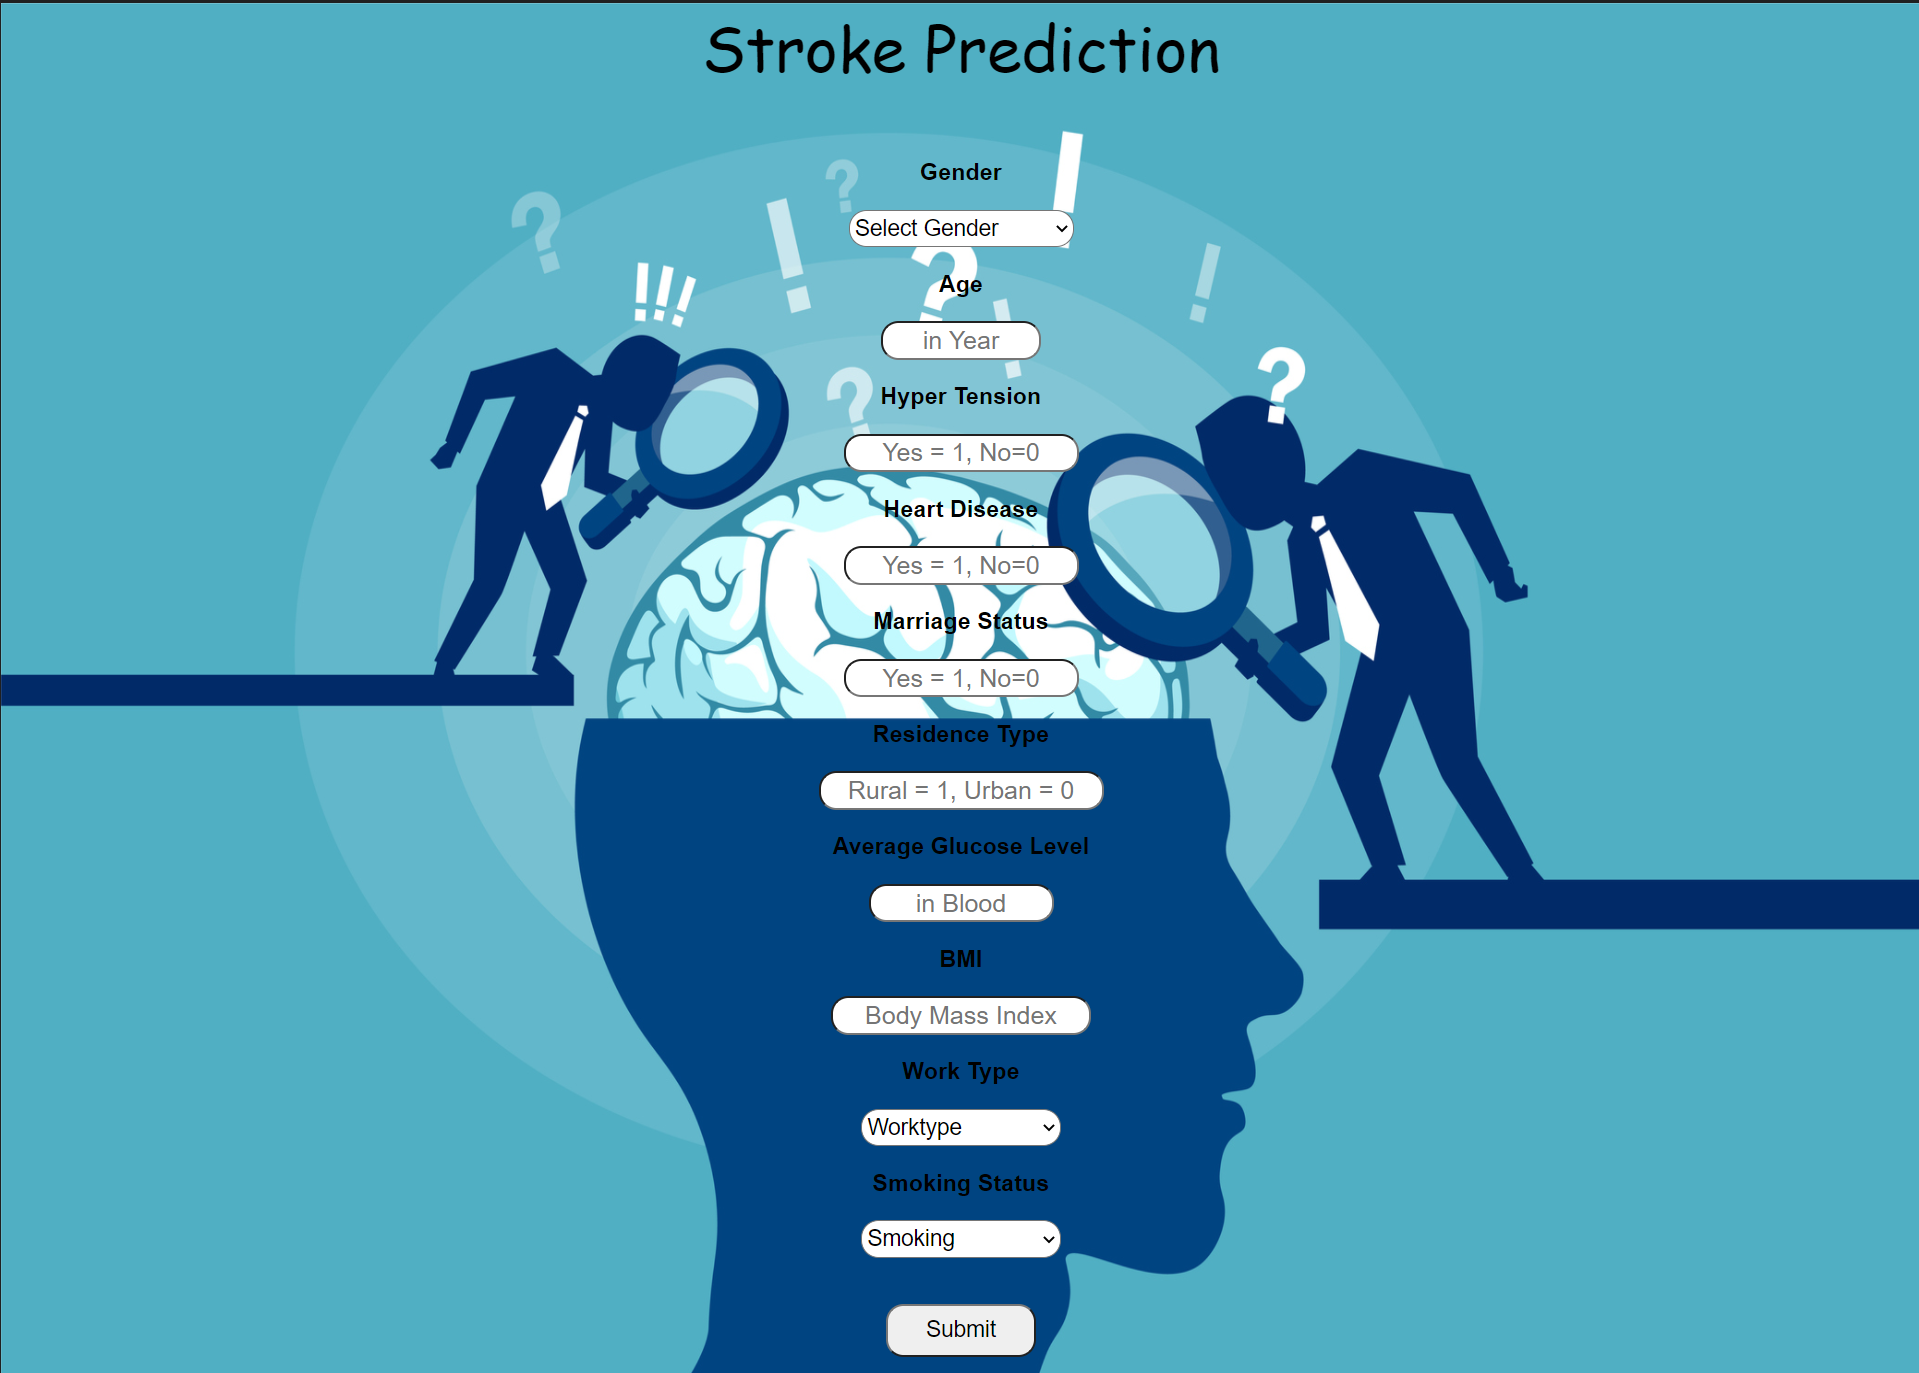

**INSERTING IMPORTANT LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#Machine Learning libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

**LOADING DATASET**

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')


**SUMMMARY OF THE DATASET**

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
rows, columns = data.shape
print(print(f"The dataset has {rows} rows and {columns} columns."))

The dataset has 5110 rows and 12 columns.
None


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


# **Exploratory Data Analysis (EDA)**

**Distribution of Target Variable**

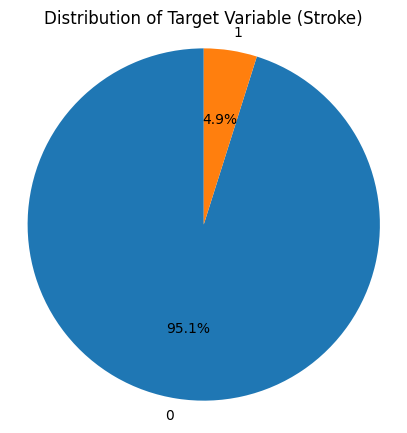

In [ ]:
# Plotting a pie chart for the distribution of the target variable 'stroke'
stroke_counts = data['stroke'].value_counts()

# Creating the pie chart with specified colors
plt.figure(figsize=(5, 5))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title("Distribution of Target Variable (Stroke)")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


OUTPUT: 95.1% of the dataset does not have a stroke, while 4.9% of the dataset has a stroke

**Distribution of numeric columns by stroke**

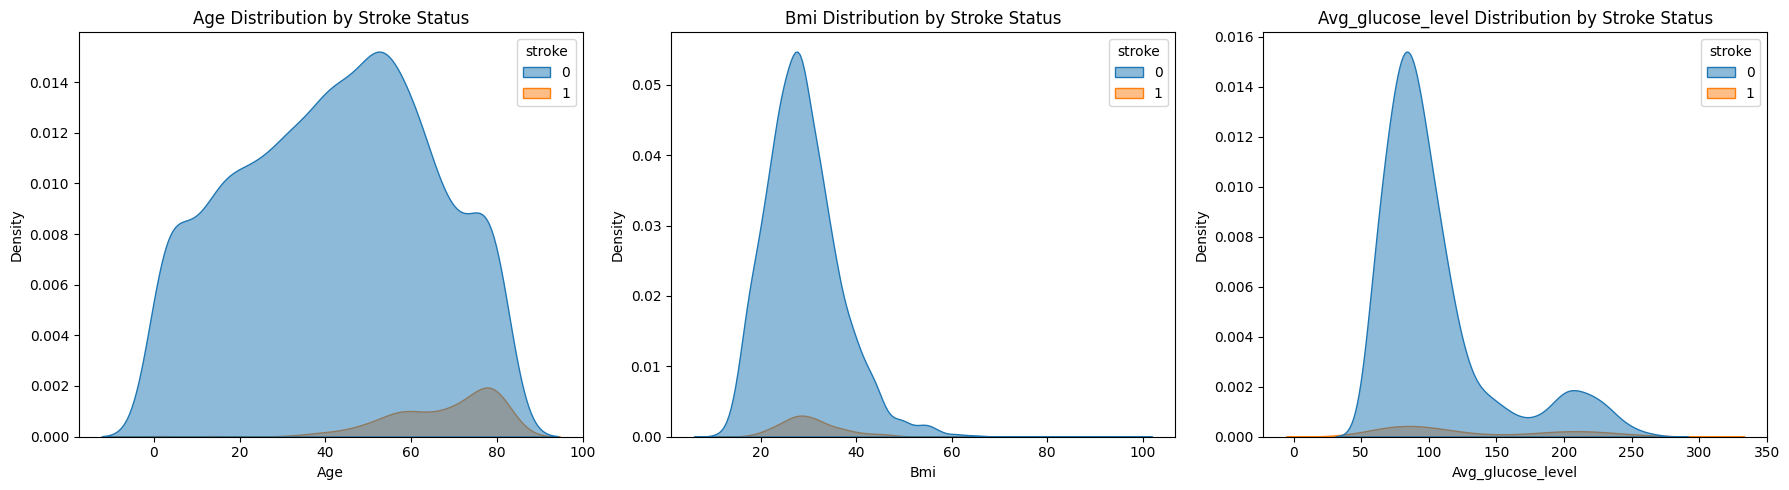

In [ ]:
numeric_cols = ['age', 'bmi', 'avg_glucose_level']
plt.figure(figsize=(18, 5))

# Define consistent colors for stroke categories
colors = ['#1f77b4', '#ff7f0e']  # Blue for 0, Orange for 1

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=data, x=col, hue='stroke', fill=True, palette=colors, alpha=0.5)
    plt.title(f'{col.capitalize()} Distribution by Stroke Status')
    plt.xlabel(col.capitalize())

plt.tight_layout()  # Adjust subplot spacing
plt.show()


**OUTPUT:**
**Age Distribution by Stroke Status:** People who had a stroke (label 1) are mostly in the older age group, particularly above 50 years, while those without a stroke (label 0) are spread across all age ranges but gradually decrease in number as age increases. This indicates that older age is a key factor in the likelihood of having a stroke.

**BMI Distribution by Stroke Status:** The stroke group (1) overlaps with the non-stroke group (0), with both showing a central peak around a BMI of 25-30 (overweight). However, stroke cases slightly increase at higher BMI levels, suggesting that while higher BMI may contribute to stroke risk, it is likely not as strong a predictor as age.

**Avg Glucose Level Distribution by Stroke Status:** Individuals who had a stroke (1) tend to have higher glucose levels, typically above 150, while non-stroke individuals (0) are mostly clustered around normal levels (80–120), with some overlap at higher levels. This shows a strong association between elevated glucose levels and the likelihood of stroke, possibly linked to conditions like diabetes or hyperglycemia.


**Analyze Numerical Features**

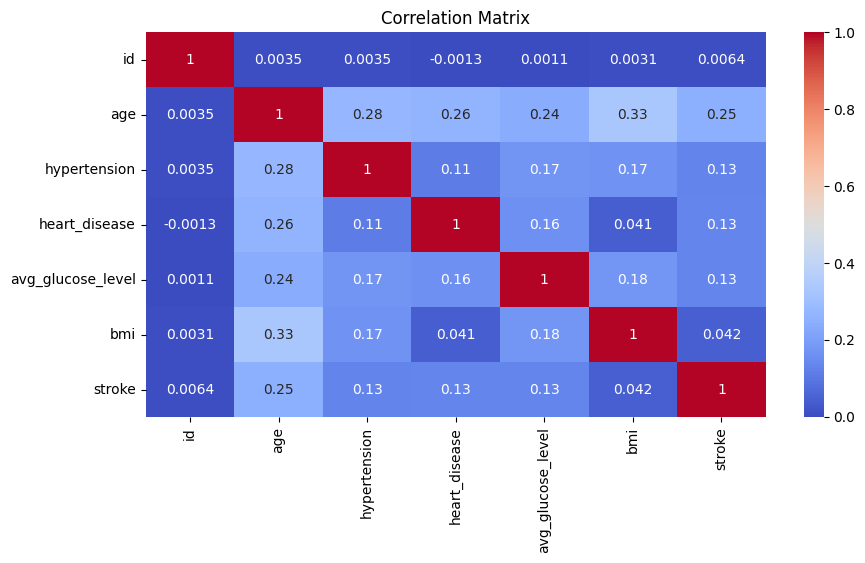

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 5))

# Compute correlation only for numerical columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**OUTPUT**: Age, glucose levels, and hypertension appear to have moderate correlations with stroke.
Most other features are weakly correlated with the target variable.

**Analyze Categorical Features**

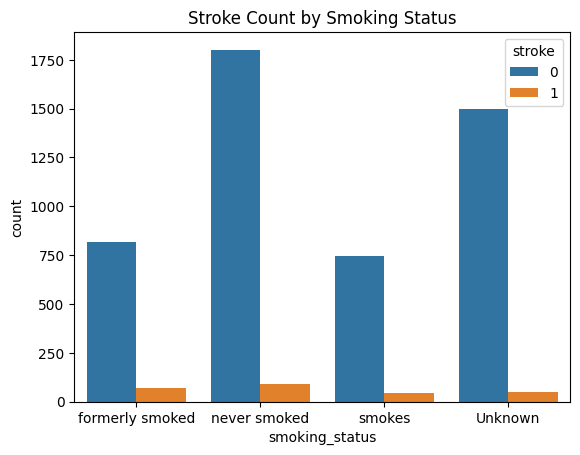

In [ ]:
# Smoking status distribution
sns.countplot(x='smoking_status', hue='stroke', data=data)
plt.title("Stroke Count by Smoking Status")
plt.show()

**OUTPUT**: The chart suggests that smoking status alone doesn’t have a strong observable link to stroke occurrences in this dataset. The number of strokes (orange) is consistently small compared to non-stroke cases (blue) across all smoking statuses.

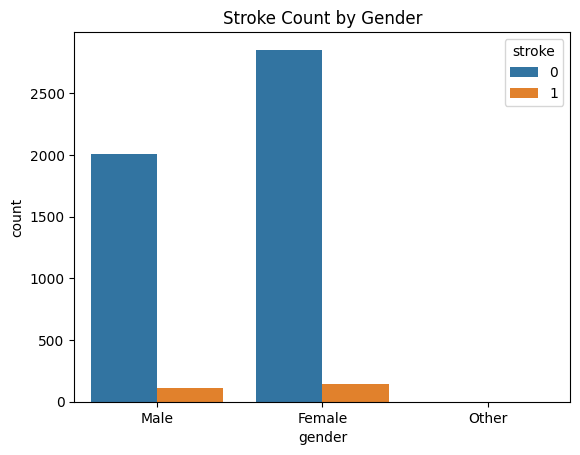

In [ ]:
sns.countplot(x='gender', hue='stroke', data=data)
plt.title("Stroke Count by Gender")
plt.show()

**OUTPUT:** Females in this dataset slightly outnumber males in both total count and stroke cases. However, strokes are generally rare for all genders. This suggests that gender might not play a dominant role in stroke occurrences, but further analysis would be needed to confirm this hypothesis statistically

# **DATA CLEANING AND PREPARATION**

In [ ]:
#Checking for missing value
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


OUTPUT: The output shows that the bmi column has 201 missing values

HANDLING MISSING VELUES

In [ ]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


OUTPUT: We are no longer having missing value

CHECKING FOR DUPLICATES

In [ ]:
print(data.duplicated().sum())

0


OUTPUT: The are no duplicates

IDENTIYING OUTLIERS

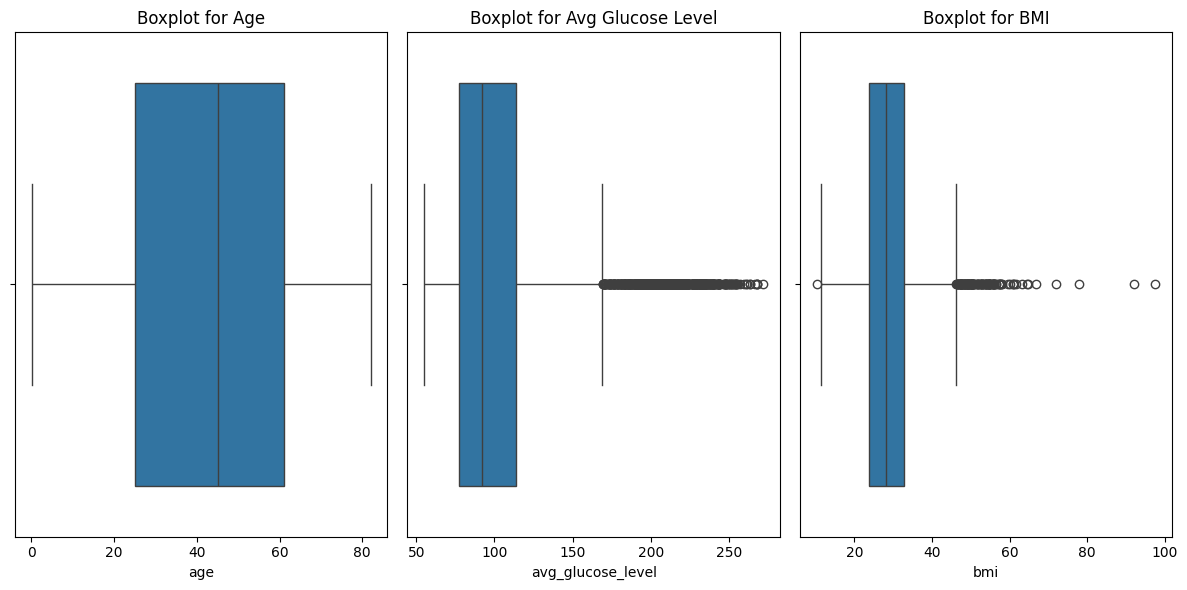

In [ ]:
# Boxplots for numerical features to identify outliers
plt.figure(figsize=(12, 6))

# Plot for Age
plt.subplot(1, 3, 1)
sns.boxplot(x=data['age'])
plt.title("Boxplot for Age")

# Plot for Avg Glucose Level
plt.subplot(1, 3, 2)
sns.boxplot(x=data['avg_glucose_level'])
plt.title("Boxplot for Avg Glucose Level")

# Plot for BMI
plt.subplot(1, 3, 3)
sns.boxplot(x=data['bmi'])
plt.title("Boxplot for BMI")

plt.tight_layout()
plt.show()



OUTPUT:

Age: Most of the data falls between roughly 20 and 60 years.There are no significant outliers (data points outside the whiskers).The median age is close to 40, meaning half of the people are younger than 40 and half are older.

Glucose Level:The majority of glucose levels fall between about 80 and 120.There are a lot of outliers on the higher end (dots outside the whiskers), meaning some people have unusually high glucose levels.

BMI (Body Mass Index):Most BMI values are between about 20 and 35.There are a number of outliers on the higher side, indicating some people have unusually high BMI values.

**HANDLING THE OUTLIERS**

Method: Apply transformations (e.g., log, square root) to reduce the impact of outliers.

In [ ]:
data['age'] = np.log1p(data['age'])  # log1p handles zeros
data['avg_glucose_level'] = np.log1p(data['avg_glucose_level'])
data['bmi'] = np.log1p(data['bmi'])


**Encode Categorical Variables**

In [ ]:
# One-hot encoding for categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


**Normalize numerical features**

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

**Normalize Numerical Features**


In [ ]:
# Define numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize numerical features
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])


**Feature Scaling**

In [ ]:
# Separate features and target variable
X = data.drop('stroke', axis=1)  # Use 'stroke' as the target column name
y = data['stroke']  # Define the target variable

# Select numerical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Initialize MinMaxScaler
scaler_minmax = MinMaxScaler()

# Apply scaling to numerical columns
X[numerical_columns] = scaler_minmax.fit_transform(X[numerical_columns])

# Verify scaled data
print(X.head())


         id  gender       age  hypertension  heart_disease ever_married  \
0  0.123214    Male  0.954091           0.0            1.0          Yes   
1  0.708205  Female  0.932816           0.0            0.0          Yes   
2  0.426015    Male  0.994382           0.0            1.0          Yes   
3  0.824928  Female  0.883272           0.0            0.0          Yes   
4  0.021929  Female  0.991521           1.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  
0        Private          Urban           0.891344  0.554964  formerly smoked  
1  Self-employed          Rural           0.813868  0.436666     never smoked  
2        Private          Rural           0.407703  0.501666     never smoked  
3        Private          Urban           0.709247  0.527132           smokes  
4  Self-employed          Rural           0.719772  0.366563     never smoked  


**Drop irrelevant columns**

In [ ]:
data = data.drop(columns=['id'])

**Check for Class Imbalance**

In [ ]:
# Check distribution of the target variable
print(data_encoded['stroke'].value_counts(normalize=True))


stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


OUTPUT:

Approximately 95.13% of the data belongs to the category 0 (no stroke).

Approximately 4.87% of the data belongs to the category 1 (stroke).

This indicates a class imbalance, which is a common issue in datasets where one class (in this case, 0) is significantly more frequent than the other (1)

**Handle Class Imbalance**

In [ ]:
# Address class imbalance using SMOTE
X = data_encoded.drop(columns=['stroke', 'id'])  # Drop irrelevant columns
y = data_encoded['stroke']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify new class distribution
print(pd.Series(y_resampled).value_counts())


stroke
1    4861
0    4861
Name: count, dtype: int64


**Visualize the new class distribution**

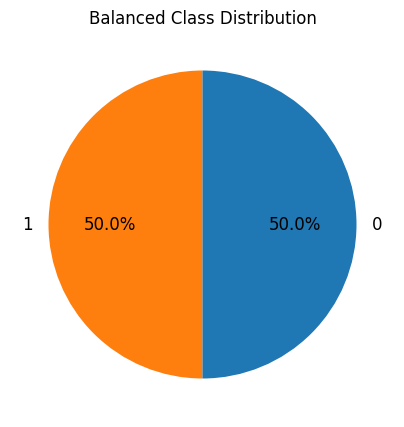

In [ ]:
# Visualize the new class distribution
plt.figure(figsize=(5, 5))
class_counts = y_resampled.value_counts()
class_labels = ['1', '0']

# Pie chart
plt.pie(
    class_counts,
    labels=class_labels,
    autopct='%1.1f%%',
    colors=['#ff7f0e', '#1f77b4'],
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title("Balanced Class Distribution")
plt.show()


OUTPUT:
The output shows that our dataset now has balanced classes, with an equal number of samples in both categories of the stroke column:

**Split the Data into Training and Testing Sets**

In [ ]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Data Normalization**

In [ ]:
scaler_minmax = MinMaxScaler()
data_encoded[numerical_columns] = scaler_minmax.fit_transform(data_encoded[numerical_columns])

# **ML Model Training and Evaluation**

**Train the Random Forest model**

In [ ]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

 **Model Evaluation**

In [ ]:
y_pred = rf_model.predict(X_test)
probs = rf_model.predict_proba(X_test)[:, 1]
print("\nRandom Forest Classifier:")
print("Classification Report:\n", classification_report(y_test, y_pred))



Random Forest Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")

Accuracy: 95.00978473581213 %


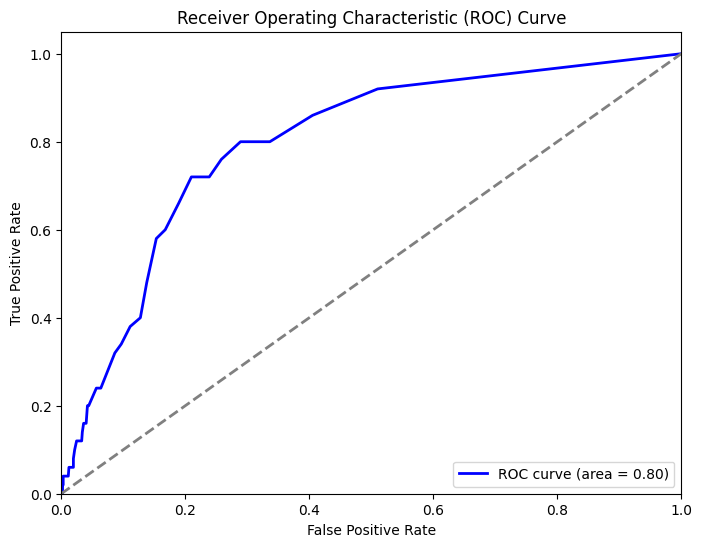

In [ ]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, probs):.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**OUTPUT:**The model has a good ability to distinguish between the positive and negative classes.
The AUC score (0.80) confirms that the model's predictions are reliable.

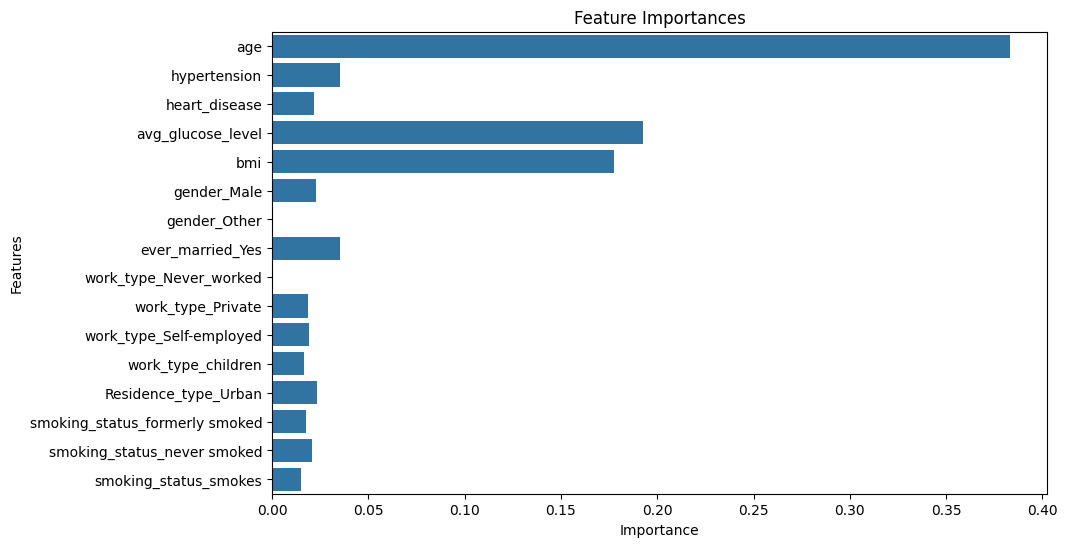

In [ ]:
# Visualize feature importance to ensure the model isn't learning spurious signals
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

**OUTPUT:** The model prioritizes age, avg_glucose_level, and bmi as key predictors. These suggest that age and metabolic health-related factors (glucose levels and BMI) are critical indicators for predicting the target outcome.